In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

**To scrape the data we will use BeautifulSoup**

In [14]:
soup = BeautifulSoup("http", 'html.parser')

#Let's start on the main page of the website
URL = 'https://www.androidrank.org/android-most-popular-google-play-apps'
r = requests.get(URL)
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')

# Initialization of an empty dataframe with the desired columns (URL is ou unique ID)
new_columns = ["URL", 'Rank','Name', 'Nb_Rating', 'Installs', 'Avg_Rating', "Ev_30", "Ev_60", "Price", "Category"]
app_pd = pd.DataFrame(columns=new_columns)

# We go throught all the categories and take all the given app and their ranking in that category
nav = soup.find("nav")
start = nav.find("b", text="Comics") #1
for b in start.find_next_siblings("b"):
    a = b.find("a")
    Category = a.get_text()
    
    # Now we move on the webpage of the desired category
    URL = 'https://www.androidrank.org/'+a["href"]
    r = requests.get(URL)
    page_body = r.text
    soup = BeautifulSoup(page_body, 'html.parser')
    
    # We select all the app on the webpage with all their informations
    table = soup.find("table", id="ranklist")
    apps = table.find_all("tr")[1:]
    for app in apps:
        
        # Ev_30 and Ev_60 corresponds to the growth of the number of ratings over the 30 and 60 respectively
        URL, Rank, Name, Nb_Rating, Installs, Avg_Rating, Ev_30, Ev_60, Price = '','','','','','','','',''
        p = app.find_all("td")
        Rank = p[0].text
        URL = p[1].find('a', href=True)["href"]
        Name = p[1].find('a', href=True).text
        Nb_Rating = p[3].text
        Installs = p[4].text
        Avg_Rating = p[5].text
        Ev_30 = p[6].text
        Ev_60 = p[7].text
        Price = p[8].text
        
        # We create a "dummy" dataframe to organize the collected data
        characteristics_pd = pd.DataFrame([[URL, Rank, Name, Nb_Rating, Installs, Avg_Rating,
                                            Ev_30, Ev_60, Price,Category]], columns = new_columns)
        
        # We append this dataframe to the global dataframe
        app_pd = app_pd.append(characteristics_pd,ignore_index=True)
    
    #we get the the URL for the next page in the same category
    nextpage = soup.find_all('small')[1].find("a", text="Next >")
    
    # We continue this until there is no next page in the given category anymore
    while(len(nextpage['href'])):
        
        urlnext_page = "https://www.androidrank.org" + nextpage['href']
        r = requests.get(urlnext_page)
        page_body = r.text
        soup = BeautifulSoup(page_body, 'html.parser')

        table = soup.find("table", id="ranklist")
        apps = table.find_all("tr")[1:]

        for app in apps:
            URL, Rank, Name, Nb_Rating, Installs, Avg_Rating, Ev_30, Ev_60, Price = '','','','','','','','',''
            p = app.find_all("td")
            Rank = p[0].text
            URL = p[1].find('a', href=True)["href"]
            Name = p[1].find('a', href=True).text
            Nb_Rating = p[3].text
            Installs = p[4].text
            Avg_Rating = p[5].text
            Ev_30 = p[6].text
            Ev_60 = p[7].text
            Price = p[8].text
            characteristics_pd = pd.DataFrame([[URL, Rank, Name, Nb_Rating, Installs, Avg_Rating,
                                                Ev_30, Ev_60, Price, Category]], columns = new_columns)
            app_pd = app_pd.append(characteristics_pd,ignore_index=True)
            
            # To avoid a crash due to the return of a None when there is no next page we manually set it to ""
            if(soup.find_all('small')[1].find("a", text="Next >")):
                nextpage = soup.find_all('small')[1].find("a", text="Next >")
            else:
                nextpage["href"] = ""

AttributeError: 'NoneType' object has no attribute 'find_all'

**Due to the excess of requests, we had to relaunch the previous cell and modify line #1 to restart from the desired category**

In [81]:
# Read the first csv containing data
df_app = pd.read_csv('data/1.csv', index_col=[0])

# Iterate through the 7 remaining files
for i in range(2,9):
    df_temp = pd.read_csv('data/' + str(i) + '.csv', index_col=[0])
    df_app = pd.concat([df_app, df_temp], ignore_index=True, join='inner')
    
# Dropping duplicates since the parsing was sometimes stopped during the analysis of one category of apps
df_app.drop_duplicates(inplace = True)
df_app.to_csv("data/final_dataset.csv")

**At the end we have the following datasets**

In [105]:
df_app = pd.read_csv('data/final_dataset.csv', index_col=[0])
df_app.head(10)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category
0,/application/canva_graphic_design_video_invite...,1.0,"Canva: Graphic Design, Video, Invite & Logo Maker","2,241,579",50.0 M,4.68,4.7%,8.8%,Free,Art & Design
1,/application/ibis_paint_x/jp.ne.ibis.ibispaint...,2.0,ibis Paint X,"642,389",10.0 M,4.45,4.4%,9.0%,Free,Art & Design
2,/application/kappboom_cool_wallpapers_backgrou...,3.0,Kappboom - Cool Wallpapers & Background Wallpa...,"399,327",10.0 M,4.63,0.0%,0.0%,Free,Art & Design
3,/application/flipaclip_cartoon_animation/com.v...,4.0,FlipaClip: Cartoon animation,"319,841",10.0 M,4.28,1.5%,3.2%,Free,Art & Design
4,/application/u_launcher_lite_new_3d_launcher_2...,5.0,"U Launcher Lite-New 3D Launcher 2019, Hide apps","216,161",10.0 M,4.52,1.6%,3.4%,Free,Art & Design
5,/application/medibang_paint_make_art_/com.medi...,6.0,MediBang Paint - Make Art !,"194,262",10.0 M,4.10,1.2%,2.5%,Free,Art & Design
6,/application/u_launcher_3d_new_launcher_2019_3...,7.0,"U Launcher 3D: New Launcher 2019, 3d themes","130,195",5.0 M,4.50,1.1%,2.0%,Free,Art & Design
7,/application/papercolor/com.eyewind.paperone,8.0,PaperColor,"111,058",10.0 M,4.23,1.9%,4.2%,Free,Art & Design
8,/application/sand_draw_sketch_drawing_pad_crea...,9.0,Sand Draw Sketch Drawing Pad: Creative Doodle Art,"99,055",5.0 M,4.37,0.9%,1.9%,Free,Art & Design
9,/application/how_to_draw_graffitis/com.sweefit...,10.0,How to Draw Graffitis,"94,175",5.0 M,4.33,0.2%,0.4%,Free,Art & Design


**Isn't it weird that we don't have 24 500 rows since we have a top 500 in each category and 49 categories?**
**Let's have a closer look**

In [106]:
df_app.Category.value_counts().tail(10)

Game Racing      500
Video Players    500
Game Music       500
Art & Design     500
Game Card        500
Dating           500
House & Home     500
Business         500
Game Casual      500
Events           297
Name: Category, dtype: int64

**By looking on the website, we see that this is not a scraping problem but that some categories have less app in the Top. This is already a good thing to highlights the difference of diversity between each categories**

**Little bit of cleaning let's convert back the number from string to int**

In [107]:
df_app

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category
0,/application/canva_graphic_design_video_invite...,1.0,"Canva: Graphic Design, Video, Invite & Logo Maker","2,241,579",50.0 M,4.68,4.7%,8.8%,Free,Art & Design
1,/application/ibis_paint_x/jp.ne.ibis.ibispaint...,2.0,ibis Paint X,"642,389",10.0 M,4.45,4.4%,9.0%,Free,Art & Design
2,/application/kappboom_cool_wallpapers_backgrou...,3.0,Kappboom - Cool Wallpapers & Background Wallpa...,"399,327",10.0 M,4.63,0.0%,0.0%,Free,Art & Design
3,/application/flipaclip_cartoon_animation/com.v...,4.0,FlipaClip: Cartoon animation,"319,841",10.0 M,4.28,1.5%,3.2%,Free,Art & Design
4,/application/u_launcher_lite_new_3d_launcher_2...,5.0,"U Launcher Lite-New 3D Launcher 2019, Hide apps","216,161",10.0 M,4.52,1.6%,3.4%,Free,Art & Design
5,/application/medibang_paint_make_art_/com.medi...,6.0,MediBang Paint - Make Art !,"194,262",10.0 M,4.10,1.2%,2.5%,Free,Art & Design
6,/application/u_launcher_3d_new_launcher_2019_3...,7.0,"U Launcher 3D: New Launcher 2019, 3d themes","130,195",5.0 M,4.50,1.1%,2.0%,Free,Art & Design
7,/application/papercolor/com.eyewind.paperone,8.0,PaperColor,"111,058",10.0 M,4.23,1.9%,4.2%,Free,Art & Design
8,/application/sand_draw_sketch_drawing_pad_crea...,9.0,Sand Draw Sketch Drawing Pad: Creative Doodle Art,"99,055",5.0 M,4.37,0.9%,1.9%,Free,Art & Design
9,/application/how_to_draw_graffitis/com.sweefit...,10.0,How to Draw Graffitis,"94,175",5.0 M,4.33,0.2%,0.4%,Free,Art & Design


In [108]:
df_app["Nb_Rating"] = df_app["Nb_Rating"].str.replace(',', '')
df_app["Nb_Rating"] = df_app["Nb_Rating"].astype(int)
df_app["Installs"] = df_app["Installs"].str.replace(' ', '')
df_app["Installs"] = (df_app["Installs"].str.replace(r'[kM]+$', '', regex=True).astype(float) * \
                        df_app["Installs"].str.extract(r'[\d\.]+([kM]+)', expand=False)
                         .fillna(1)
                          .replace(['k','M'], [10**3, 10**6]).astype(int))
df_app["Avg_Rating"] = df_app["Avg_Rating"].astype(float)
df_app["Nb_Rating"] = df_app["Nb_Rating"].astype(int)
df_app["Installs"] = df_app["Installs"].str.replace(' ', '')
df_app.head(5)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category
0,/application/canva_graphic_design_video_invite...,1.0,"Canva: Graphic Design, Video, Invite & Logo Maker",2241579,50000000.0,4.68,4.7%,8.8%,Free,Art & Design
1,/application/ibis_paint_x/jp.ne.ibis.ibispaint...,2.0,ibis Paint X,642389,10000000.0,4.45,4.4%,9.0%,Free,Art & Design
2,/application/kappboom_cool_wallpapers_backgrou...,3.0,Kappboom - Cool Wallpapers & Background Wallpa...,399327,10000000.0,4.63,0.0%,0.0%,Free,Art & Design
3,/application/flipaclip_cartoon_animation/com.v...,4.0,FlipaClip: Cartoon animation,319841,10000000.0,4.28,1.5%,3.2%,Free,Art & Design
4,/application/u_launcher_lite_new_3d_launcher_2...,5.0,"U Launcher Lite-New 3D Launcher 2019, Hide apps",216161,10000000.0,4.52,1.6%,3.4%,Free,Art & Design


**Now let's see the repartion of the free and paid app on the Google Play Store**

In [110]:
df_app["Price"].value_counts().head(10)

Free     24672
$4.99       23
$0.99       19
$2.99       18
$1.99       15
$3.99       10
$6.99        5
$9.99        4
$5.99        4
$2.49        4
Name: Price, dtype: int64

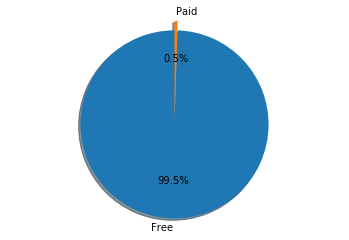

In [112]:
labels = 'Free', 'Paid'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[df_app["Price"]=="Free"])[0], np.shape(df_app[df_app["Price"]!="Free"])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Now let's see this distribution over all the categories**

In [117]:
free = []
paid = []
for category in df_app.Category.unique():
    free_cat = np.shape(df_app[(df_app["Price"]=="Free") & (df_app["Category"]== category)])[0]
    paid_cat = np.shape(df_app[(df_app["Price"]!="Free") & (df_app["Category"]== category)])[0]
    free.append(free_cat/(free_cat+paid_cat)*100)
    paid.append((paid_cat/(free_cat+paid_cat))*100)
ind = np.arange(len(df_app.Category.unique()))    
width = 0.25      
plt.figure(figsize=(20,10))
p1 = plt.bar(ind, free, width,)
p2 = plt.bar(ind, paid, width,
             bottom=free)

plt.ylabel("Percentage")
plt.title('Scores by group and gender')
plt.xticks(ind, df_app.Category.unique())
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('Free', 'Paid'))

plt.show()

ZeroDivisionError: division by zero

# Analysis

**Thanks to an API on the same website we can also get more detailled information but it is limited to 100 requests per hour**

**These cells will be explored later to get more information for the best ranked app in the overall ranking**

In [ ]:
import requests
website = "https://www.androidrank.org/api/application/"
app = "com.facebook.katana"
key = "60lnc52x178li1rocmpum3829kdf6d9wt3dp7lqg7vxmqat6ov9ekcoipmqyuzpa"
search = website+app+"?key="+key;
response = requests.get(search)

In [25]:
response.json()

{'category': 'Social',
 'category_rank': {'current': []},
 'developer': {'developer_id': 'Facebook', 'name': 'Facebook'},
 'id': 'com.facebook.katana',
 'images': {'logo': 'https://lh3.googleusercontent.com/ccWDU4A7fX1R24v-vvT480ySh26AYp97g1VrIB_FIdjRcuQB2JP2WdY7h_wVVAeSpg',
  'screenshots': ['https://lh3.googleusercontent.com/JelCBr0rDjDEGOqYb4m2Z7OSVBxS5KyqO94eW5TGnQtHc9k08uaMZVTz6s_rKha31eE',
   'https://lh3.googleusercontent.com/Iomoub5EHkAk1_bKqIyjkFbKQ4vw-zFfTqfUMG_da-4-hV_tXwvuiFQUQWIeol_fRSo',
   'https://lh3.googleusercontent.com/Jx0nPnGaGNRXCHlmGv13gDsIzhLykgkza5y2SUNruZoiwcik5lQ-gj99vdHZA0Zlbtrz',
   'https://lh3.googleusercontent.com/YBTVMqZcl-t16dnH7_DxHsMm7WU2v2HdZRX3Q3UnYHXo8HUfQSuN2Ahn_M4KQunbeigu',
   'https://lh3.googleusercontent.com/o4enSNrWkR4F6wILxPk6-6XkNyea4j9tcn8gLPphbBvhpp4_HBU9NNuQnhzreYH5uSN0']},
 'installs': {'current': {'count': '5000000000'},
  'history': [{'count': 5000000000, 'date': '2019-10-16'},
   {'count': 1000000000, 'date': '2014-08-28'},
   {'co